In [1]:
import pygmt
import numpy as np
import pandas as pd

In [2]:
path = '/Users/sydneydybing/StrainProject/2024/taiwan_strain_data/'

stas = pd.read_csv(path + 'station_data.csv')
stas

,Sta,Lat,Lon,Depth(m)
0,BCWB,24.2184,121.6891,-192
1,TRKB,24.1614,121.6127,-192
2,NTTB,24.1728,121.5259,-175
3,SJNB,24.1073,121.6006,-193
4,HGSB,23.4903,121.4237,-266
5,CHMB,23.4868,121.4703,-191
6,SSNB,23.4423,121.3981,-185
7,ZANB,23.3947,121.4585,-218
8,FBRB,23.1406,121.2796,-200
9,SSTB,23.1340,121.3782,-199


In [5]:
events = pd.read_csv(path + 'events_csv.csv')
events

,evt_id,origin_time,lat,lon,depth
0,2009-10-03_M6.1,2009-10-03T17:36:06.120,23.630,121.452,28.0
1,2013-10-31_M6.3,2013-10-31T12:02:08.720,23.590,121.437,10.0
2,2018-02-04_M6.1,2018-02-04T13:56:41.950,24.157,121.708,12.0


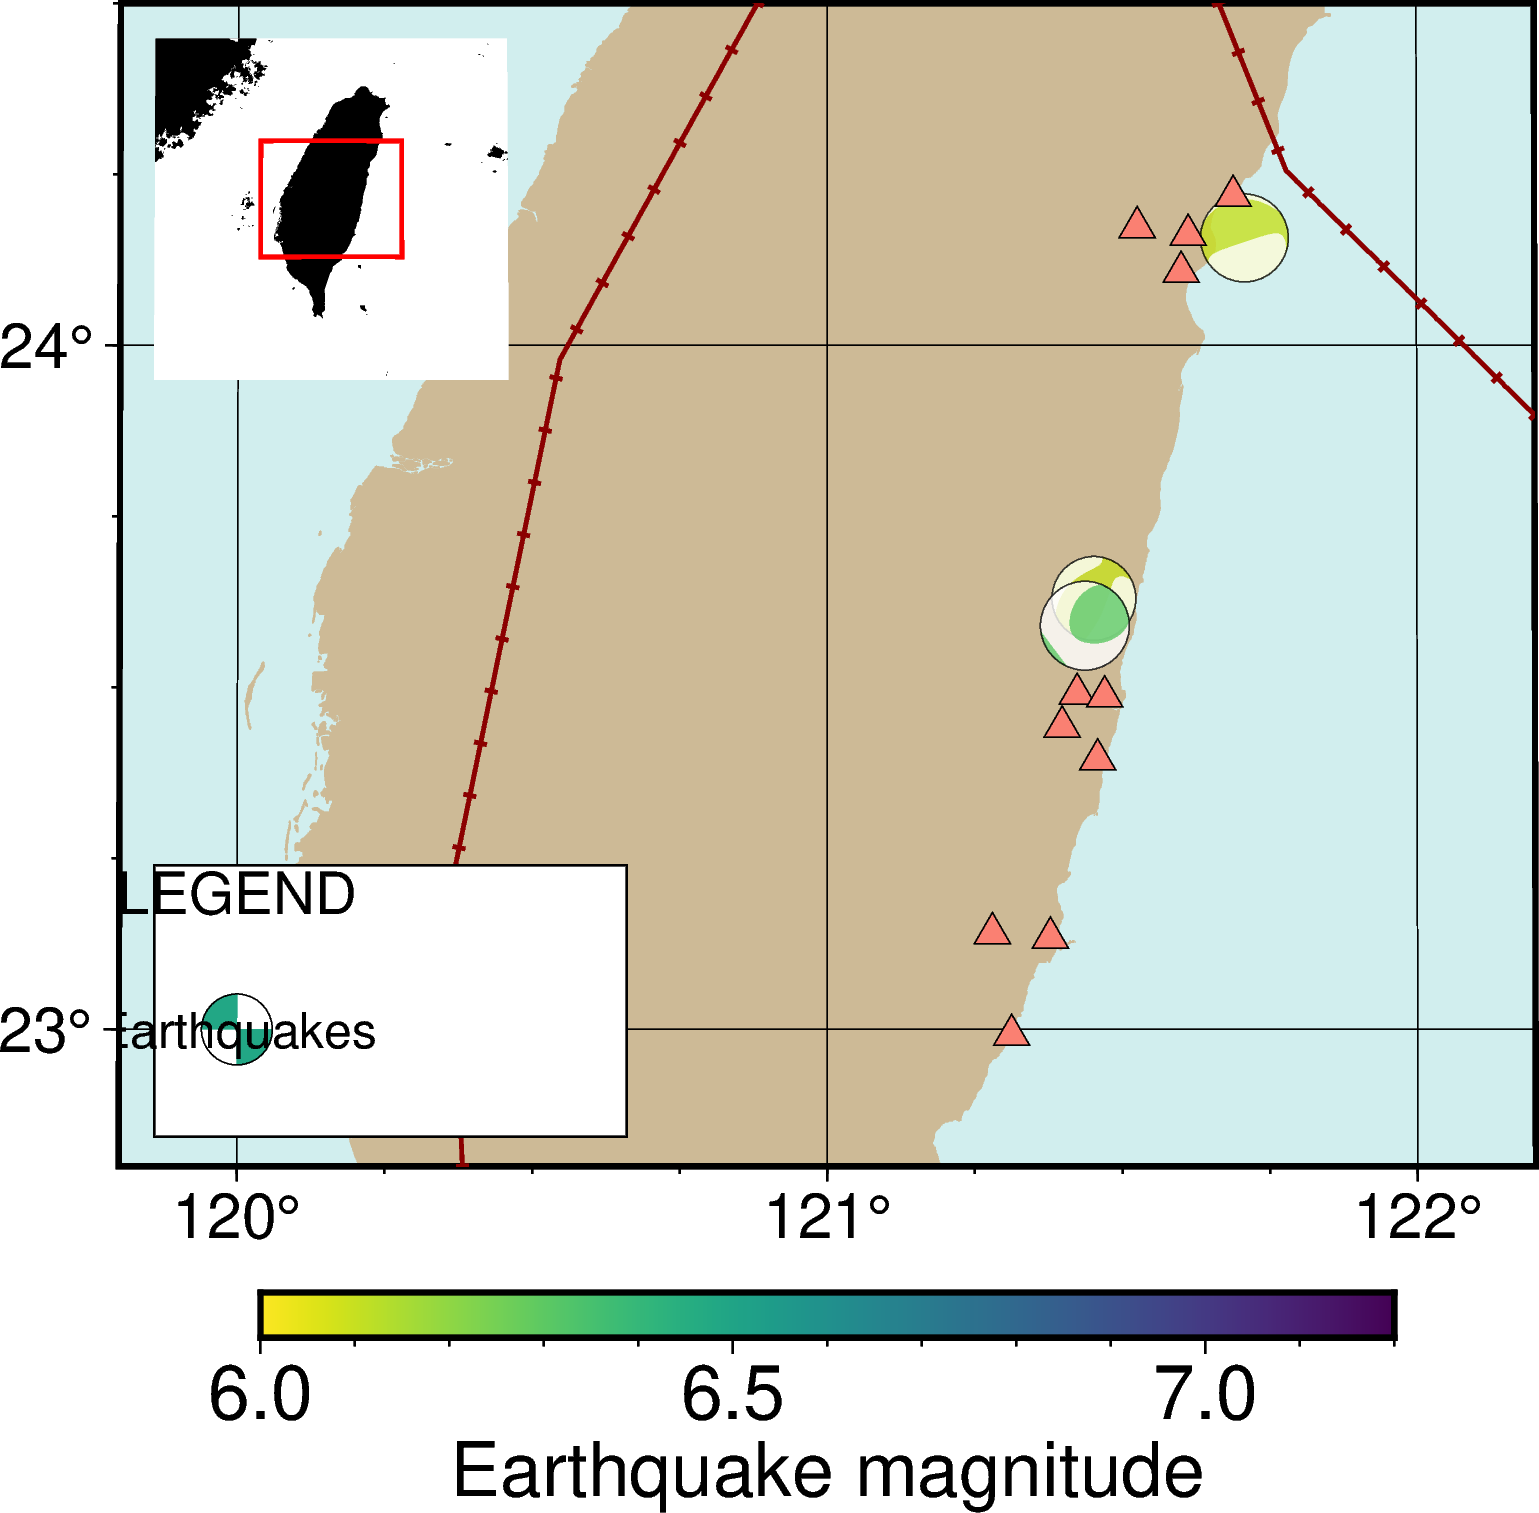

In [32]:
mag_file = '/Users/sydneydybing/StrainProject/2024/taiwan3eq_psmeca_formattedwmag.txt'

psmeca_mag_file = np.genfromtxt(mag_file, dtype = float)
psmeca_mags = psmeca_mag_file[:,2].astype(float)
pygmt.makecpt(cmap = 'magma', series = [psmeca_mags.min()-0.1, psmeca_mags.max()+0.2], reverse = True, output = '/Users/sydneydybing/StrainProject/2024/taiwan_mag_cpt.cpt')

circ = False
fm = True

pygmt.config(COLOR_BACKGROUND = 'white')

fig = pygmt.Figure()

region = [119.8,122.2,22.8,24.5]
fig.coast(region = region, projection = 'N12c', land = 'wheat3', water = 'lightcyan2', frame = 'afg') # Coastline
fig.plot(data = '/Users/sydneydybing/StrainProject/2024/PB2002_boundaries.gmt', pen = '1p,darkred', style = 'f0.25/3p', fill = 'darkred') # Plate boundaries

# Plot earthquakes

if circ:
    fig.plot(x = 142.373, y = 38.297, style = 'c0.7c', fill = 'blue', pen = 'black')
    
# Focal mechanisms

if fm:
    fig.meca(spec = mag_file, convention = 'mt', scale = '0.6c', cmap = '/Users/sydneydybing/StrainProject/2024/mag_cpt.cpt', transparency = 20)
    with pygmt.config(FONT = '18'):
        fig.colorbar(frame = 'af+lEarthquake magnitude', cmap = '/Users/sydneydybing/StrainProject/2024/mag_cpt.cpt')

# Plot stations 

fig.plot(x = stas.Lon, y = stas.Lat, style = 't0.35c', fill = 'salmon', pen = 'black') # Symbols
# fig.text(x = na_stas.LONG+1, y = na_stas.LAT, text = na_stas.BNUM, font = '6p,black') # Labels

# Make legend

with fig.inset(position = 'jBL+w4c/2.3c+o0.3c/0.25c', box = '+p0.5+gwhite'):
    pass
# fig.plot(x = -131.25, y = 30.5, fill = '#22a785', pen = 'black', style = 'c0.6c')
legend_meca = {'strike': 90, 'dip': 90, 'rake': 0, 'magnitude': 5}
fig.meca(spec = legend_meca, scale = '0.6c', longitude = 120, latitude = 23, depth = 0, compressionfill = '#22a785')
fig.text(text = ['Earthquakes'], x = 120, y = 23, font = '12p,black')
fig.text(text = ['Tohoku M9.1'], x = 142.5, y = 33.5, font = '12p,black')
fig.plot(x = 140.3, y = 32.7, fill = 'salmon', pen = 'black', style = 't0.35c')
fig.text(text = ['Strainmeters'], x = 142.5, y = 32.75, font = '12p,black')
fig.text(text = ['LEGEND'], x = 120, y = 23.2, font = '14p,black')

# Add inset map

with fig.inset(position = 'jTL+o0.3c/0.3c', region = [118, 124, 21, 26], projection = 'N3c'): # jTR means top right point on the map is the anchor, w = width (can add /height), o is dx/dy offset from anchor
    fig.coast(projection = 'N3c', land = 'black', water = 'white')
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data = rectangle, style = 'r+s', pen = '1p,red')

# Show or save 

fig.show();

# fig.savefig(path + 'figures/Taiwan_earthquakes_station_map.pdf');